# **Word Graph**

## Installasi pymupdf

In [ ]:
pip install --upgrade pymupdf

## Menghubungkan Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Membaca Paper dan Membuat file txt

In [ ]:
import pymupdf

doc = pymupdf.open("kanker_payudara.pdf") # open a document
out = open("kanker_payudara.txt", "wb") # create a text output
for page in doc: # iterate the document pages
    text = page.get_text().encode("utf8") # get plain text (is in UTF-8)
    out.write(text) # write text of page
    out.write(bytes((12,))) # write page delimiter (form feed 0x0C)
out.close()

## Installasi nltk

In [ ]:
!pip install nltk

## Installasi Library nltk

In [ ]:
import nltk
nltk.download('punkt')  # hanya perlu sekali
nltk.download('punkt_tab')  # opsional, untuk versi terbaru NLTK (≥3.8.2)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Membaca file txt

In [ ]:
with open('kanker_payudara.txt', 'r', encoding='utf-8') as file:
    teks = file.read()

print(teks[:200])  # tampilkan 200 karakter pertama

Diterima Redaksi : 24-10-2019 | Selesai Revisi : 26-11-2019 | Diterbitkan Online : 10-12-2019 
458 
 
 
Terakreditasi SINTA Peringkat 2 
Surat Keputusan Dirjen Penguatan Riset dan Pengembangan Ristek 


## Membaca kalimat

In [ ]:
# Install: pip install nltk
import nltk


#text = "Ini adalah kalimat pertama. Ini kalimat kedua? Ya!"
all_words = []
sentences = nltk.sent_tokenize(teks)
# Output: ['Ini adalah kalimat pertama.', 'Ini kalimat kedua?', 'Ya!']

## Mengubah sekumpulan data (list) menjadi bentuk tabel (DataFrame)

In [ ]:
import pandas as pd
df = pd.DataFrame(sentences, columns=['kalimat'])
print(df)

                                               kalimat
0    Diterima Redaksi : 24-10-2019 | Selesai Revisi...
1              10/E/KPT/2019 \nmasa berlaku mulai Vol.
2                                                1 No.
3                               1 tahun 2017 s.d  Vol.
4                                                5 No.
..                                                 ...
649  Morgan \nKaufmann division of Academic Press, ...
650  [67] E. \nPrasetyo, \nData \nMining: \nKonsep ...
651        Yogyakarta, Indonesia: Andi Offset, \n2012.
652  [68] T. Sutojo, E. Mulyanto, and V. Suhartono,...
653          Yogyakarta, Indonesia: Andi Offset, 2011.

[654 rows x 1 columns]


# Import data di atas menjadi csv

In [ ]:
df.to_csv('kalimat.csv', index=False, encoding='utf-8')

## Untuk membuat word graph

## Lanjutkan dengan menggunakan https://www.geeksforgeeks.org/nlp/co-occurence-matrix-in-nlp/

In [ ]:
import fitz
import re
import numpy as np
from collections import defaultdict, Counter


In [ ]:
def extract_all_words_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""

    for page in doc:
        text += page.get_text()

    doc.close()

    # Bersihkan ringan (JANGAN buang kata penting)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = text.lower()

    # SPLIT LANGSUNG → semua kata muncul
    all_words = text.split()

    return all_words


In [ ]:
all_words = extract_all_words_from_pdf("kanker_payudara.pdf")


In [ ]:
window_size = 2
co_occurrences = defaultdict(Counter)

for i, word in enumerate(all_words):
    start = max(0, i - window_size)
    end = min(len(all_words), i + window_size + 1)

    for j in range(start, end):
        if i != j:
            neighbor = all_words[j]
            co_occurrences[word][neighbor] += 1


In [ ]:
unique_words = list(co_occurrences.keys())
word_index = {word: idx for idx, word in enumerate(unique_words)}


In [ ]:
co_matrix = np.zeros(
    (len(unique_words), len(unique_words)),
    dtype=int
)

for word, neighbors in co_occurrences.items():
    for neighbor, count in neighbors.items():
        if neighbor in word_index:
            co_matrix[word_index[word]][word_index[neighbor]] = count


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict, Counter
import numpy as np
import pandas as pd

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Sample text
text = """Kanker Payudara merupakan kanker yang paling sering ditemukan pada wanita dan tingkat kematiannya masih berada pada
posisi dua di antara penyakit kanker laiinya"""

# Preprocess the text
stop_words = set(stopwords.words('english'))
words = word_tokenize(text.lower())
words = [word for word in words if word.isalnum() and word not in stop_words]

# Define the window size for co-occurrence
window_size = 2

# Create a list of co-occurring word pairs
co_occurrences = defaultdict(Counter)
for i, word in enumerate(words):
    for j in range(max(0, i - window_size), min(len(words), i + window_size + 1)):
        if i != j:
            co_occurrences[word][words[j]] += 1

# Create a list of unique words
unique_words = list(set(words))

# Initialize the co-occurrence matrix
co_matrix = np.zeros((len(unique_words), len(unique_words)), dtype=int)

# Populate the co-occurrence matrix
word_index = {word: idx for idx, word in enumerate(unique_words)}
for word, neighbors in co_occurrences.items():
    for neighbor, count in neighbors.items():
        co_matrix[word_index[word]][word_index[neighbor]] = count

# Create a DataFrame for better readability
co_matrix_df = pd.DataFrame(co_matrix, index=unique_words, columns=unique_words)

# Display the co-occurrence matrix
co_matrix_df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,wanita,laiinya,merupakan,penyakit,dua,dan,yang,kematiannya,ditemukan,masih,berada,tingkat,posisi,paling,antara,kanker,sering,di,payudara,pada
wanita,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
laiinya,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
merupakan,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,1,0
penyakit,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
dua,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
dan,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
yang,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0
kematiannya,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0
ditemukan,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
masih,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1


In [ ]:
window_size = 2
co_occurrences = defaultdict(Counter)

for i, word in enumerate(all_words):
    for j in range(max(0, i - window_size), min(len(all_words), i + window_size + 1)):
        if i != j:
            co_occurrences[word][all_words[j]] += 1

# Daftar kata unik
unique_words = list(set(all_words))
word_index = {word: idx for idx, word in enumerate(unique_words)}

# Matriks co-occurrence
co_matrix = np.zeros((len(unique_words), len(unique_words)), dtype=int)
for word, neighbors in co_occurrences.items():
    for neighbor, count in neighbors.items():
        co_matrix[word_index[word]][word_index[neighbor]] = count

In [ ]:
pip install networkx

In [ ]:
import networkx as nx

G = nx.Graph()

for word, neighbors in co_occurrences.items():
    for neighbor, weight in neighbors.items():
        G.add_edge(word, neighbor, weight=weight)


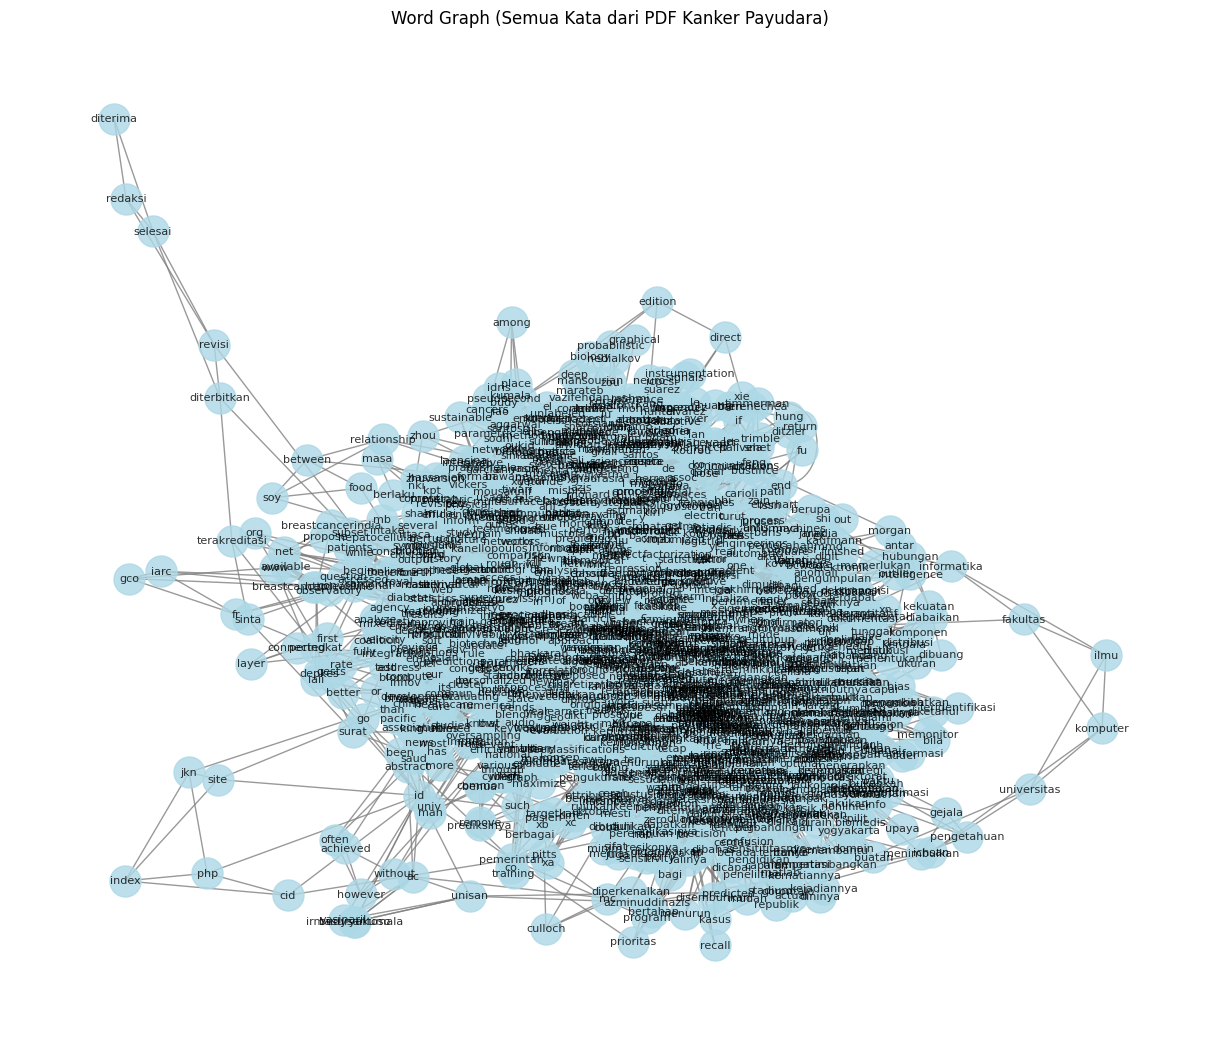

In [ ]:
plt.figure(figsize=(12, 10))

pos = nx.spring_layout(G, seed=42, k=0.5)

nx.draw(
    G,
    pos,
    with_labels=True,       # Label = kata
    node_size=500,
    node_color='lightblue',
    font_size=8,
    alpha=0.8,
    edge_color='gray'
)

plt.title("Word Graph (Semua Kata dari PDF Kanker Payudara)")
plt.show()
